In [1]:
from fastcore.all import * 
from fastai.vision.all import *

# Downloading data set

In [2]:
from fastai.data.external import untar_data, URLs 
path = untar_data(URLs.CAMVID_TINY) #giving an small version of camVid dataset that used for segmentation task

# Data preprocessing

In [3]:
dls = SegmentationDataLoaders.from_label_func(
    path #our dataset
    , bs=8 #batch size
    , fnames = get_image_files(path/"images"),#list of image file
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}', #match each data to its own label
    codes = np.loadtxt(path/'codes.txt', dtype=str), #list of class name
    batch_tfms=aug_transforms(mult=1.0) # adds random flips, zoom, warp, lighting(Data Augmentation)
)

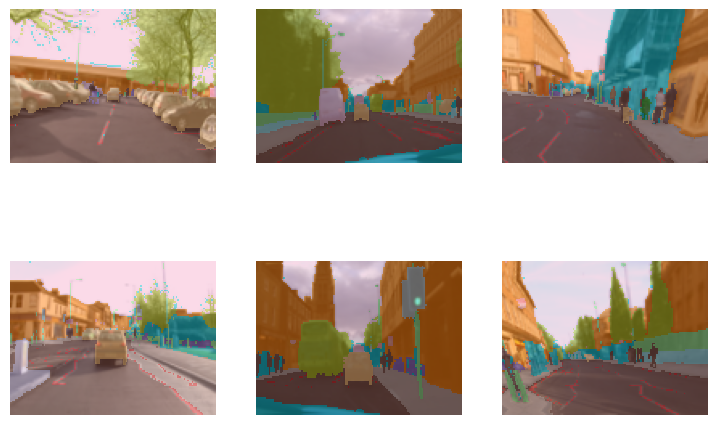

In [4]:
dls.show_batch(max_n=6)#show a 6 random images from training data

# Train model

In [5]:

from fastai.losses import DiceLoss
from fastai.metrics import Dice
learn = unet_learner(dls, resnet50,loss_func=DiceLoss() , metrics=Dice()) #use ResNet-50 pretrained model on our data and use Dice as metric
learn.fine_tune(30,base_lr=1e-4,cbs=EarlyStoppingCallback(monitor='valid_loss', patience=3)) #doing this for 8 epochs

epoch,train_loss,valid_loss,dice,time
0,248.947693,224.076294,18.135379,02:52


epoch,train_loss,valid_loss,dice,time
0,243.780640,217.014526,18.482426,02:59
1,242.303711,215.754181,17.910555,03:17
2,240.913589,212.869415,17.922150,03:15
3,239.534149,211.115875,17.683770,03:11
4,238.221725,209.925995,17.969014,03:15
5,236.795258,207.211823,18.258458,03:12
6,235.519089,205.481842,18.338775,03:11
7,234.176544,204.354492,18.284974,03:13
8,232.981354,204.225388,18.434735,03:05
9,231.532318,200.994583,15.745877,03:16


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

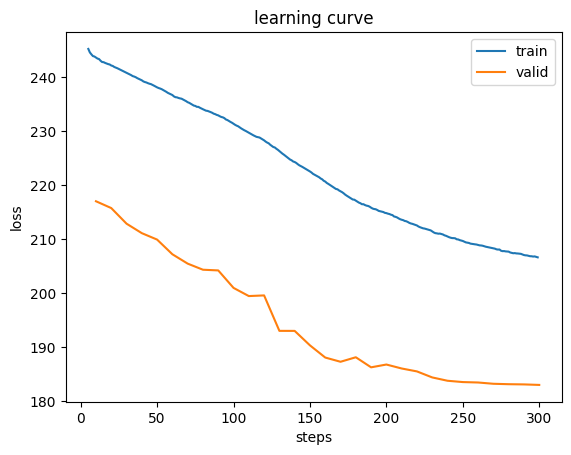

In [6]:
learn.recorder.plot_loss()

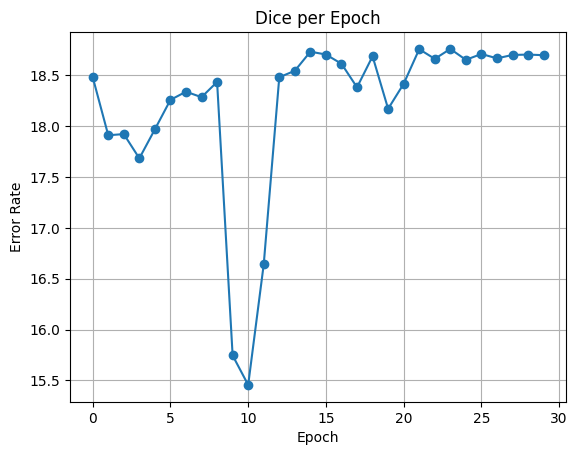

In [7]:
import matplotlib.pyplot as plt

# Get all training history values (one list per epoch)
history = learn.recorder.values

# Extract the error rate (3rd value in each list) for every epoch
errors = []
for epoch_data in history:
    error = epoch_data[2]  # index 2 = error rate
    errors.append(error)
plt.plot(errors, marker='o')
plt.title("Dice per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Error Rate")
plt.grid(True)
plt.show()

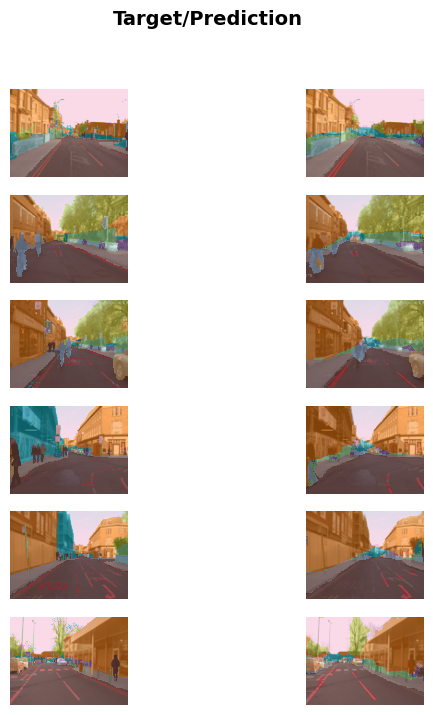

In [8]:
learn.show_results(max_n=6, figsize=(7,8))